<a href="https://www.kaggle.com/code/lucasrathgeb/mohs-hardness-prediction?scriptVersionId=159051255" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import uniform, randint
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import MaxNorm
from keras import regularizers

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [4]:
plt.rcdefaults()

In [5]:
train_data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [6]:
X_train = train_data.copy()
X_train = X_train.drop("id",axis=1)
X_train = X_train.drop("Hardness",axis=1)

X_test = test_data.copy()
X_test = X_test.drop("id",axis=1)

y_train = train_data["Hardness"].to_frame()
# print(type(y_train))

print(X_train.isnull().sum())
print(X_test.isnull().sum())

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64


Hardness
6.00     2063
5.50     1463
2.50     1089
3.80      712
5.80      403
6.50      397
2.00      388
2.80      387
5.00      375
4.00      370
3.00      310
2.30      292
6.30      266
3.50      261
6.80      240
1.50      174
1.80      158
3.30      144
5.30      135
4.30      130
4.80      105
7.50       98
4.50       97
7.00       96
7.80       64
9.00       33
10.00      30
9.50       25
1.30       18
8.50       15
8.00       12
5.75       10
6.20       10
7.30       10
8.10        7
2.90        5
1.00        2
2.20        1
5.40        1
6.70        1
2.60        1
3.60        1
8.30        1
4.10        1
3.20        1
4.70        1
6.40        1
9.80        1
2.10        1
6.64        1
Name: count, dtype: int64


<Axes: xlabel='Hardness', ylabel='Count'>

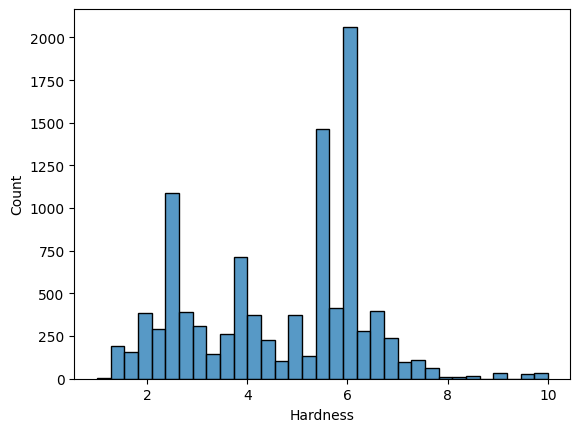

In [7]:
# train_data["Hardness"].value_counts().plot(kind='bar')
print(train_data["Hardness"].value_counts())

sns.histplot(train_data["Hardness"])

In [8]:
print("description of X_train")
X_train.describe()

description of X_train


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000


In [9]:
print("description of X_test")
X_test.describe()

description of X_test


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000
mean,126.460128,14.794020,17.406186,4.546852,38.422790,10.921512,2.608119,1.737907,0.949638,0.491675,2.152065
std,207.564499,18.982447,10.996089,0.683158,27.344351,1.378980,0.322873,0.190584,0.179266,0.060829,1.958213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.584314,2.527500,1.678000,0.866667,0.476095,0.812440
50%,100.000000,10.650000,12.666667,4.750000,26.203827,11.202760,2.706000,1.736000,0.920000,0.488550,1.351550
75%,128.000000,16.601328,22.000000,4.800000,48.719500,11.645560,2.806667,1.820000,0.990000,0.496118,2.780220
max,10116.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615333,0.825990,10.970000


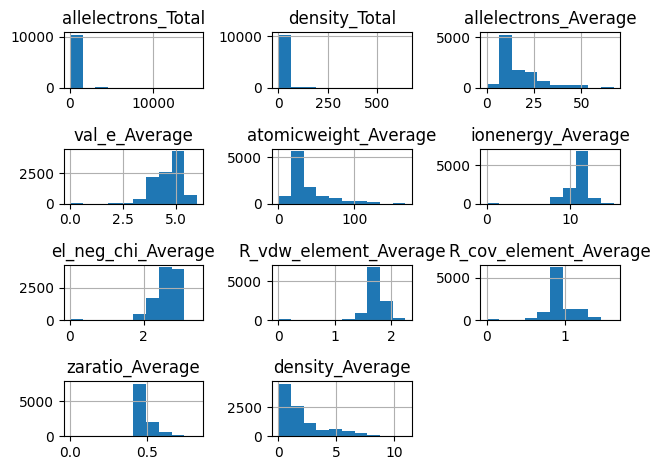

In [10]:
X_train.hist()
plt.tight_layout()
plt.show()

In [11]:
print(X_train.shape)

(10407, 11)


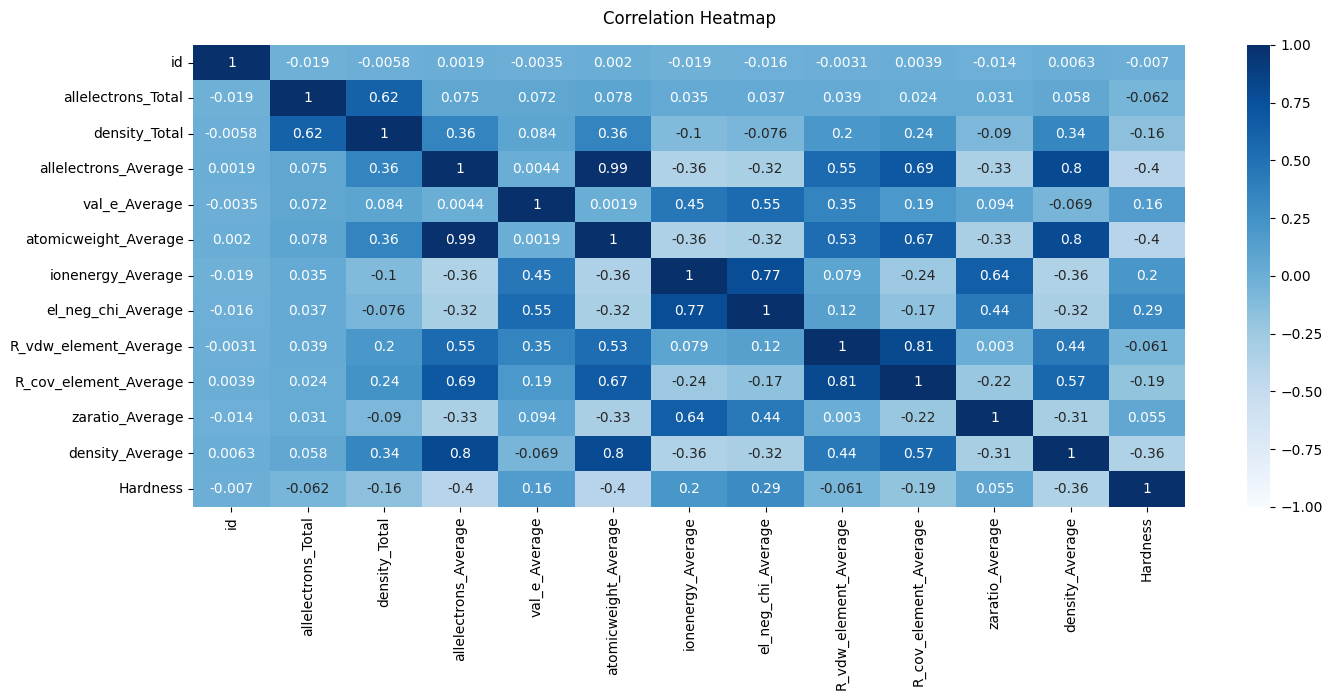

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15);

Text(0.5, 1.0, 'allelectrons_Total To see Outliers')

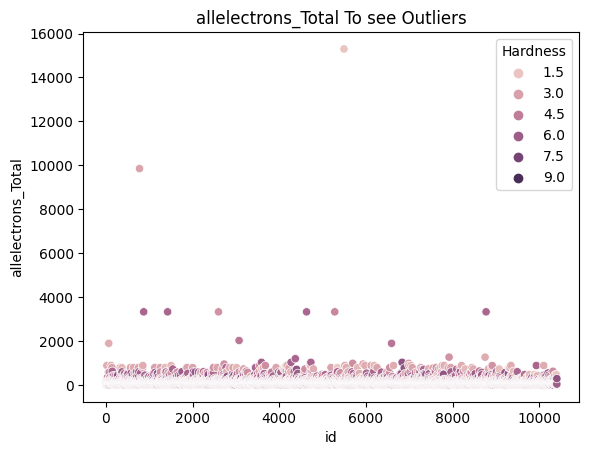

In [13]:
sns.scatterplot(train_data, x='id', y='allelectrons_Total', hue="Hardness")
plt.title("allelectrons_Total To see Outliers")

Text(0.5, 1.0, 'density_Total To see Outliers')

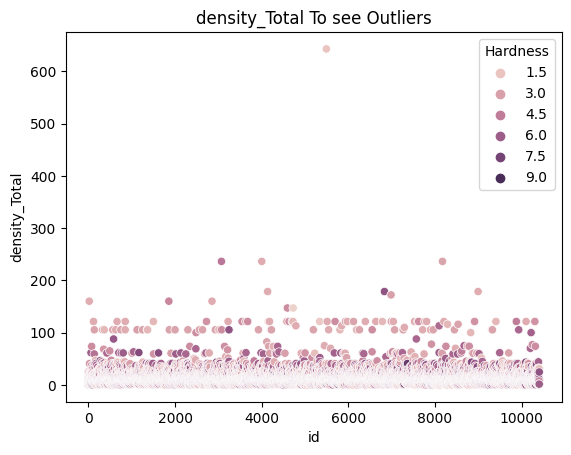

In [14]:
sns.scatterplot(train_data, x='id', y='density_Total', hue="Hardness")
plt.title("density_Total To see Outliers")

In [15]:
import tensorflow_probability as tfp

def median_abs_error(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

* Early stopping
* Gradient clipping
* Batch size adjustment
* Weight Regularization

In [16]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [17]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
# print(X_train[X_train['allelectrons_Total']>2000])

allelectron_outliers = X_train[X_train['allelectrons_Total']>2000].index
print("number of allelectron outliers found: ", len(allelectron_outliers))
X_train = X_train.drop(allelectron_outliers)
y_train = y_train.drop(allelectron_outliers)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
density_total_outliers = X_train[X_train['density_Total']>150].index
X_train = X_train.drop(density_total_outliers)
y_train = y_train.drop(density_total_outliers)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
print("number of density total outliers found: ", len(density_total_outliers))



# print(X_train)
X_train.describe()

number of allelectron outliers found:  9
number of density total outliers found:  9


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000,10389.000000
mean,123.137332,14.259943,17.025702,4.547431,37.488487,10.939031,2.608002,1.731206,0.943986,0.493339,2.132491
std,111.494217,13.667388,10.460358,0.690511,25.993476,1.407648,0.334709,0.192443,0.179802,0.063064,1.936198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732000,0.915556,0.488550,1.351550
75%,130.000000,16.676996,22.000000,4.800000,48.719500,11.667433,2.805000,1.800000,0.981667,0.496070,2.741550
max,1894.000000,147.252000,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000


In [19]:
#Convert Training, test data to np.arrays for Tensorflow/Keras
# print(X_train)
# print(np.array(X_train).astype(np.float64))
# y_train.dtypes

X_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
# print(X_train[0])
print(y_train)

[[6. ]
 [6.5]
 [2.5]
 ...
 [1.8]
 [6. ]
 [6.5]]


# Training

In [20]:
# xgb_model = XGBRegressor()
# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 3),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(3, 15), # default 3
#     "n_estimators": randint(75, 500), # default 100
#     "subsample": uniform(0.7, 0.3)
# }

# search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=10, n_iter=200, cv=4, verbose=1, n_jobs=1, return_train_score=True)

# search.fit(X_train, y_train)

# report_best_scores(search.cv_results_, 1)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
Model with rank: 1
Mean validation score: 0.478 (std: 0.008)
Parameters: {'colsample_bytree': 0.7105275588642778, 'gamma': 2.304839331535617, 'learning_rate': 0.048321952237456334, 'max_depth': 5, 'n_estimators': 355, 'subsample': 0.7412474332091976}

Fitting 4 folds for each of 200 candidates, totalling 800 fits

Model with rank: 1\
Mean validation score: 0.480 (std: 0.008)\
Parameters: {'colsample_bytree': 0.8743173721404714, 'gamma': 0.26247915757171614, 'learning_rate': 0.06506383187231946, 'max_depth': 4, 'n_estimators': 392, 'subsample': 0.9198385806389565}

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from xgboost import XGBRegressor

xg_model = XGBRegressor(colsample_bytree=0.71053,
                       gamma=02.305,
                       learning_rate=0.048322,
                       max_depth=45,
                       n_estimators=355,
                       subsample=0.74125)

In [22]:
xg_model.fit(X_train, y_train)
xg_preds = xg_model.predict(X_train)
print(xg_preds)
print(train_data["Hardness"])

[6.0650315 5.615134  3.4484634 ... 2.2370665 5.906997  6.1753483]
0        6.0
1        6.5
2        2.5
3        6.0
4        6.0
        ... 
10402    4.0
10403    5.0
10404    1.8
10405    6.0
10406    6.5
Name: Hardness, Length: 10407, dtype: float64


In [23]:
# from lightgbm import LGBMRegressor
# from sklearn.linear_model import LinearRegression
# # from catboost import CatBoostRegressor
# from sklearn.linear_model import SGDRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn import svm

# lgm = LGBMRegressor()
# lin_reg = LinearRegression()
# # cat = CatBoostRegressor()
# grad_reg = GradientBoostingRegressor()
# sv = svm.SVR()

# lgm.fit(X_train,y_train)
# lin_reg.fit(X_train,y_train)
# grad_reg.fit(X_train,y_train)
# sv.fit(X_train,y_train)
# models = [lgm, lin_reg, grad_reg , xg_model]

In [24]:
# lgm_preds = lgm.predict(X_train)
# lin_reg_preds = lin_reg.predict(X_train)
# sv_preds = sv.predict(X_train)
# # sgd_reg_preds = sgd_reg.predict(X_train)
# grad_reg_preds = grad_reg.predict(X_train)

# p_df = pd.DataFrame()
# p_df["lgm_preds"] = lgm_preds
# p_df["lin_reg_preds"] = lin_reg_preds
# p_df["sv_preds"] = sv_preds
# p_df["xg_preds"] = xg_preds
# p_df["grad_reg_preds"] = grad_reg_preds
# # p_df["Actual_Hardness"] = train_data["Hardness"]



# print(p_df)

In [25]:
print(pd.DataFrame(X_train))
X_train = pd.DataFrame(X_train)
X_train["xgb_pred"] = xg_preds
# X_train["lgm_preds"] = lgm_preds
# X_train["lin_reg_preds"] = lin_reg_preds
# X_train["sv_preds"] = sv_preds
# X_train["grad_reg_preds"] = grad_reg_preds

X_train = np.array(X_train).astype('float32')
print(X_train)

          0          1          2         3          4          5         6   \
0      100.0   0.841611  10.000000  4.800000  20.612526  11.088100  2.766000   
1      100.0   7.558488  10.000000  4.800000  20.298893  12.040830  2.755000   
2       76.0   8.885992  15.600000  5.600000  33.739258  12.086300  2.828000   
3      100.0   8.795296  10.000000  4.800000  20.213348  10.948500  2.648000   
4      116.0   9.577996  11.600000  4.800000  24.988132  11.824480  2.766000   
...      ...        ...        ...       ...        ...        ...       ...   
10384  128.0   7.558488  12.000000  4.000000  26.385218  11.330440  2.644000   
10385   30.0   1.743160  10.000000  5.333333  20.766935  14.163934  3.090000   
10386  196.0  30.920000  24.500000  5.500000  53.490299  10.074300  2.295000   
10387   38.0   1.553160  12.666667  4.666667  26.621687  11.290033  2.743333   
10388  288.0  24.655329  11.142858  4.571429  22.536125  10.960357  2.792143   

             7         8         9     

In [26]:
features = X_train.shape[1]
print("Number of features is:", features)
# X_train.describe()

Number of features is: 12


## Distribution of Model Predictions so far

In [27]:
# fig, axes = plt.subplots(2, 2)
# plt.subplot(231)
# sns.histplot(X_train["xgb_pred"])
# plt.subplot(232)
# sns.histplot(X_train["lgm_preds"])
# plt.subplot(233)
# sns.histplot(X_train["lin_reg_preds"])
# plt.subplot(234)
# sns.histplot(X_train["grad_reg_preds"])


In [28]:
#Optionally only consider the other model outputs and none of the original training data features

# X_train = p_df

In [29]:
#Early stopping callback
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=2)

# Keras Model

In [30]:


model = keras.Sequential()
model.add(InputLayer(input_shape=(features,)))
model.add(BatchNormalization())
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
model.add(Dense(32, kernel_regularizer=regularizers.l1(0.01), activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

#gradient descent with momentum for testing
sgd = SGD(learning_rate=0.0005, momentum=0.9)
test_adam = tf.keras.optimizers.Adam(clipvalue = 0.5)

model.compile(loss=median_abs_error, 
              optimizer='adam', 
              metrics=['mean_absolute_error','mean_squared_error'])

history = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_split=0.1,
                    callbacks=[early_stopping],
                    batch_size=256)

Epoch 1/500
37/37 [==============================] - 2s 11ms/step - loss: 5.9838 - mean_absolute_error: 4.3689 - mean_squared_error: 22.2686 - val_loss: 3.4628 - val_mean_absolute_error: 2.3517 - val_mean_squared_error: 7.5766
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 5.1271 - mean_absolute_error: 3.6657 - mean_squared_error: 16.6111 - val_loss: 2.9292 - val_mean_absolute_error: 1.9523 - val_mean_squared_error: 5.1040
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 4.0605 - mean_absolute_error: 2.8160 - mean_squared_error: 10.4617 - val_loss: 2.3255 - val_mean_absolute_error: 1.6042 - val_mean_squared_error: 3.7714
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 3.0711 - mean_absolute_error: 2.0359 - mean_squared_error: 5.6897 - val_loss: 1.9289 - val_mean_absolute_error: 1.4830 - val_mean_squared_error: 4.2024
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 1.9715 - mean_absolute_

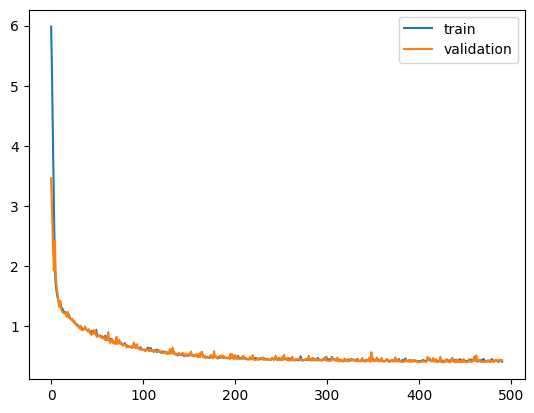

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Predicting and Evaluating

In [32]:
#compute median absolute error used for scoring on the training set
def list_median_abs_error(y_true, y_pred):
    return np.median(np.abs(y_true-y_pred))

prediction_df = pd.DataFrame()

prediction_df["Actual Hardness"] = pd.DataFrame(y_train)
train_preds = model.predict(X_train)
prediction_df["Predicted Hardness"] = train_preds
# print(prediction_df)
# print(y_train)
med_err = list_median_abs_error(np.array(y_train), train_preds[:,0].tolist()) 
print("Median Absolute Error Before Rounding: ", med_err)

rounded_preds = np.round(train_preds,1)

prediction_df["Rounded Predicted Hardness"] = rounded_preds
med_err = list_median_abs_error(np.array(y_train), rounded_preds[:,0].tolist()) 
print("Median Absolute Error After Rounding: ", med_err)
print(prediction_df)
prediction_df.describe()

325/325 [==============================] - 0s 1ms/step
Median Absolute Error Before Rounding:  1.5804831981658936
Median Absolute Error After Rounding:  1.5999999046325684
       Actual Hardness  Predicted Hardness  Rounded Predicted Hardness
0                  6.0            6.209025                         6.2
1                  6.5            5.671122                         5.7
2                  2.5            2.799596                         2.8
3                  6.0            6.047944                         6.0
4                  6.0            5.893125                         5.9
...                ...                 ...                         ...
10384              4.0            5.179185                         5.2
10385              5.0            4.531137                         4.5
10386              1.8            2.107452                         2.1
10387              6.0            6.082206                         6.1
10388              6.5            6.480742     

,Actual Hardness,Predicted Hardness,Rounded Predicted Hardness
count,10389.00000,10389.000000,10389.000000
mean,4.64870,4.601004,4.601156
std,1.68052,1.545403,1.545877
min,1.00000,1.969640,2.000000
25%,3.00000,3.019913,3.000000
50%,5.50000,5.143970,5.100000
75%,6.00000,5.913430,5.900000
max,10.00000,11.115340,11.100000


Rounded Predicted Hardness
6.0     658
6.1     584
5.9     574
5.8     513
2.3     453
       ... 
10.1      1
10.4      1
9.4       1
8.9       1
9.7       1
Name: count, Length: 86, dtype: int64


<Axes: xlabel='Rounded Predicted Hardness', ylabel='Count'>

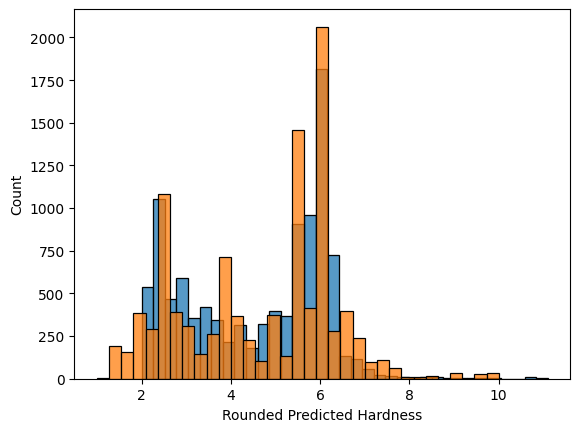

In [33]:
print(prediction_df["Rounded Predicted Hardness"].value_counts())

sns.histplot(prediction_df["Rounded Predicted Hardness"])
sns.histplot(prediction_df["Actual Hardness"])

In [34]:
base_features = list(X_test.columns.values)
X_test["xgb_pred"] = xg_model.predict(X_test[base_features])
# X_test["lgm_preds"] = lgm.predict(X_test[base_features])
# X_test["lin_reg_preds"] = lin_reg.predict(X_test[base_features])
# X_test["grad_reg_preds"] = grad_reg.predict(X_test[base_features])
# X_test["sv_preds"] = sv.predict(X_test[base_features])

X_test = np.array(X_test).astype('float32')

In [35]:
preds = model.predict(X_test)
print(preds)

217/217 [==============================] - 0s 1ms/step
[[2.6974483]
 [2.2551472]
 [5.861897 ]
 ...
 [5.5937233]
 [4.3355284]
 [2.5920396]]


In [36]:
print(np.round(preds,1))

[[2.7]
 [2.3]
 [5.9]
 ...
 [5.6]
 [4.3]
 [2.6]]


In [37]:
submission = pd.DataFrame()
submission["id"] = test_data["id"]
submission["Hardness"] = np.round(preds[:,0].tolist(),1)
# xg_preds = xg_model.predict(X_test)
# submission["Hardness"] = xg_preds

print(submission)
submission.to_csv('submission.csv',index=False)
submission.describe()

         id  Hardness
0     10407       2.7
1     10408       2.3
2     10409       5.9
3     10410       4.7
4     10411       5.5
...     ...       ...
6934  17341       5.9
6935  17342       4.0
6936  17343       5.6
6937  17344       4.3
6938  17345       2.6

[6939 rows x 2 columns]


,id,Hardness
count,6939.000000,6939.000000
mean,13876.000000,4.579262
std,2003.261091,1.370655
min,10407.000000,2.000000
25%,12141.500000,3.400000
50%,13876.000000,4.900000
75%,15610.500000,5.700000
max,17345.000000,11.100000
